<a href="https://colab.research.google.com/github/kkr016/building_price_prediction/blob/main/housepriceprediction_with_conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("/content/train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
data.shape

(7109, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#Cleaning of the Raw Data Set

In [7]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
mean_value=data['QS_OVERALL'].mean()
data['QS_OVERALL'].fillna(value=mean_value, inplace=True)

In [9]:
data.QS_OVERALL.isnull().sum()

0

In [10]:
data['N_BEDROOM'] = data['N_BEDROOM'].replace(np.nan, data.N_BEDROOM.mode().values[0])
data['N_BEDROOM'] = data['N_BEDROOM'].astype('int64')                                 # Converting all float vals to int

In [11]:
data['N_BATHROOM'] = data['N_BATHROOM'].replace(np.nan, data.N_BEDROOM.mode().values[0])
data['N_BATHROOM'] = data['N_BATHROOM'].astype('int64')                                 # Converting all float vals to int

In [12]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

#Column wise EDA

In [13]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [14]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#Derived_SALES_PRICE

* Creating "Derived_SALES_PRICE" column Using [REG_FEE, COMMIS, SALES_PRICE] columns.
* ***NOTE:*** If you are a customer want to known the final amount you need to include Tax for the purchasing the building, and brokerage if Applicable.


In [15]:
data["Derived_SALES_PRICE"]=data["REG_FEE"]+data["COMMIS"]+data["SALES_PRICE"]
data=data.drop(["REG_FEE", "COMMIS", "SALES_PRICE"], axis=1)
data.shape[1]

20

In [16]:
corelation=data.corr()

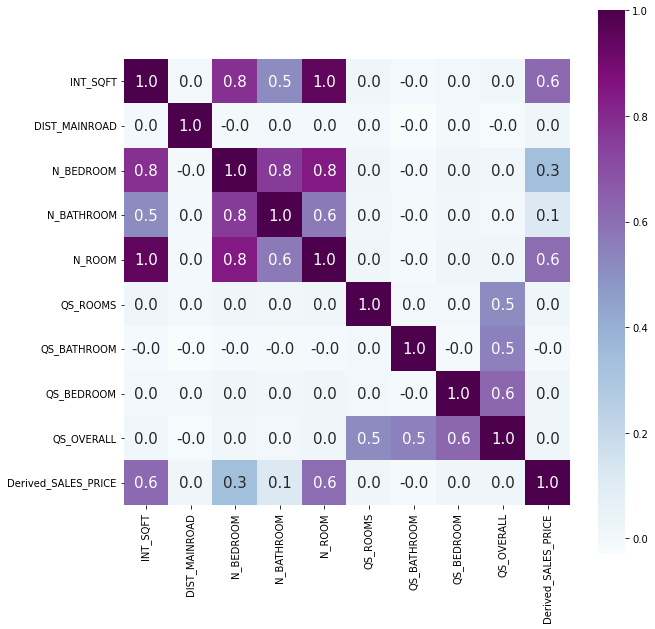

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='BuPu')
plt.show()

***NOTE:*** This coleration is calculated before the encoding

* There is good corelation in between the Derived_SALES_PRICE with ["INT_SQFT, N_ROOM, Area, N_BEDROOM, BUILDTYPE"]

In [18]:
#sns.pairplot(data, hue="AREA", height=2.5)
#plt.show()

**PRT_ID**

In [19]:
len(data.PRT_ID.unique()), data.shape

(7109, (7109, 20))

In [20]:
data=data.drop('PRT_ID',axis=1)
data.shape[1]

19

* All the rows were unique in PRT_ID column. It may affect the model. So remove the particular column\feature from the dataset.

**AREA**

In [21]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [22]:
data=data.replace({'AREA':{'Karapakkam':'Karapakkam', 'Karapakam':'Karapakkam'}})
data=data.replace({'AREA':{'Anna Nagar':'Anna Nagar', 'Ana Nagar':'Anna Nagar', 'Ann Nagar':'Anna Nagar'}})
data=data.replace({'AREA':{'Adyar':'Adyar', 'Adyr':'Adyar'}})
data=data.replace({'AREA':{'Velachery':'Velacheri', 'Velchery':'Velacheri'}})
data=data.replace({'AREA':{'Chrompet':'Chromepet', 'Chrompt':'Chromepet', 'Chrmpet':'Chromepet', 'Chormpet':'Chromepet'}})
data=data.replace({'AREA':{'KK Nagar':'K.K. Nagar', 'KKNagar':'K.K. Nagar'}})
data=data.replace({'AREA':{'TNagar':'Thyagaraya Nagar', 'T Nagar':'Thyagaraya Nagar'}})

In [23]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velacheri', 'Chromepet',
       'K.K. Nagar', 'Thyagaraya Nagar'], dtype=object)

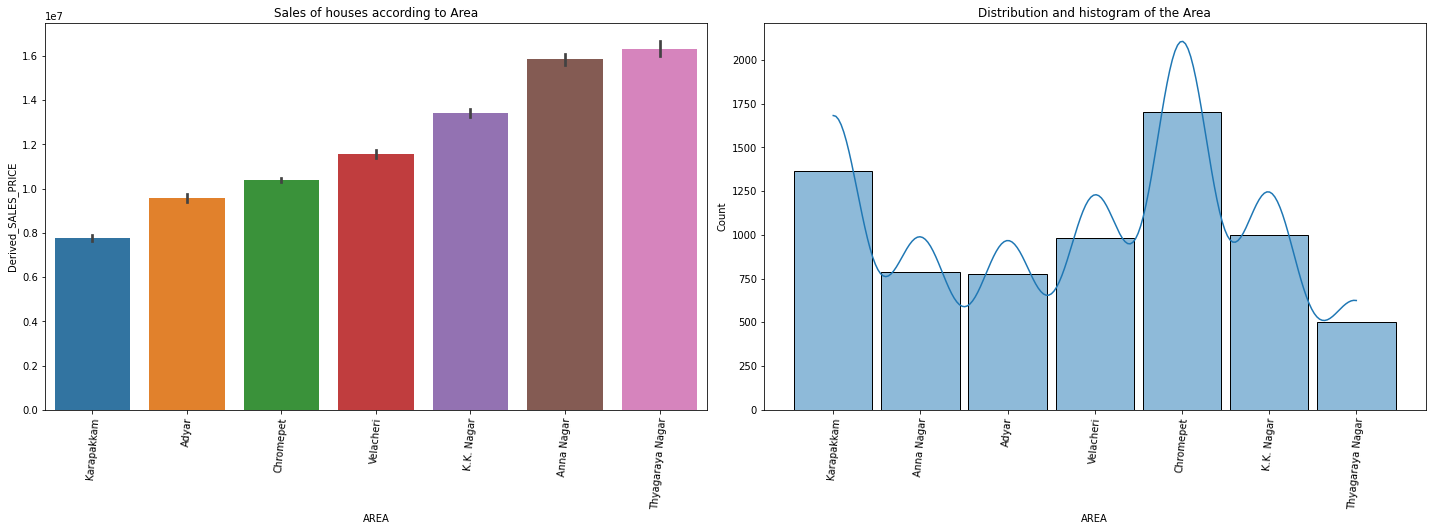

In [24]:
plt.figure(figsize=(20,13))
plt.subplot(221)
plt.xticks(rotation=85)
plt.xlabel('Area')
plt.ylabel('Derived_SALES_PRICE')
plt.title('Sales of houses according to Area')
sns.barplot(x=data.AREA,
            y=data.Derived_SALES_PRICE,order=data.groupby('AREA')['Derived_SALES_PRICE'].mean().reset_index().sort_values('Derived_SALES_PRICE',ascending = True)['AREA'])

plt.subplot(222)
sns.histplot(data, x="AREA", binwidth=1, kde=True, shrink=0.9)
plt.title('Distribution and histogram of the Area')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

***Insighgts:*** In the fearture area, there is a good linearity in the data points.

***Insighgts:*** Histogram tells the area i.e. "Chromepet" has highest no of buildings sold, followed by "Karapakkam", "K.K. Nagar"...

**2nd highest no of buildings sold at a particular area was "Karapakkam" but compared to bar plot, mean rate of cost of all the buildings in "Karapakkam" is the least value.**

**i.e. "Karapakkam" is the cheaptest area compared to other areas**


In [25]:
data.AREA.value_counts()

Chromepet           1702
Karapakkam          1366
K.K. Nagar           997
Velacheri            981
Anna Nagar           788
Adyar                774
Thyagaraya Nagar     501
Name: AREA, dtype: int64

**INT_SQFT**

In [26]:
f1=px.scatter(data, x="INT_SQFT", y="Derived_SALES_PRICE", color="INT_SQFT")
f1.show()

***Insights:*** Above plot clearly deliver good linearity between sale price and total square feet of the building.

* Building price is increased when the area (Square feet) of the building.increases

**DIST_MAINROAD**

In [27]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

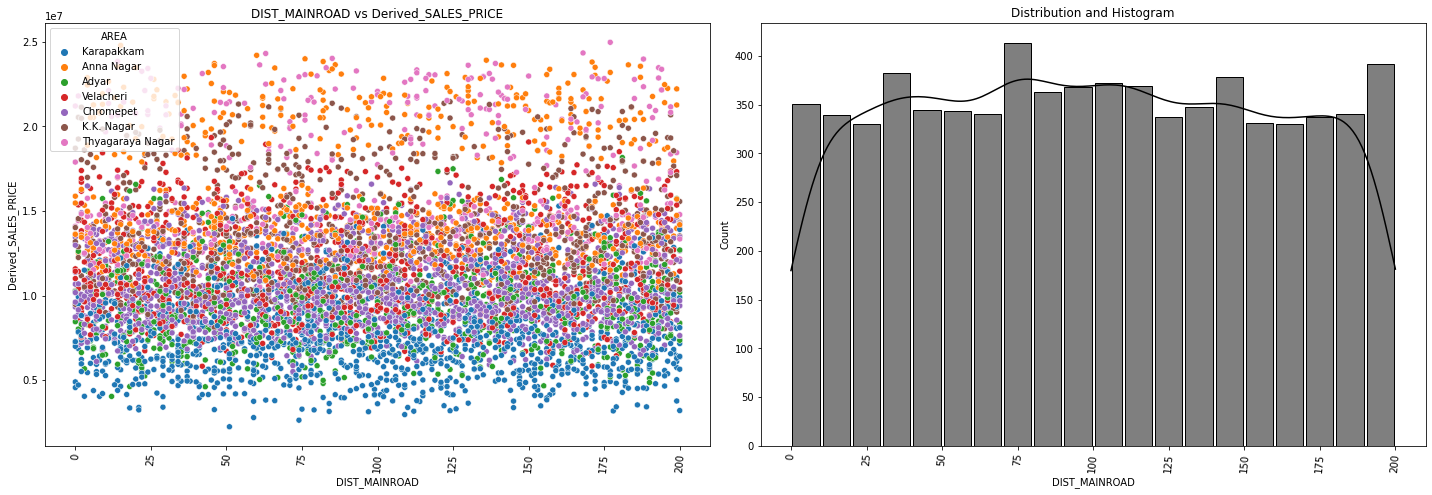

In [28]:
plt.figure(figsize=(20,13))
plt.subplot(221)

sns.scatterplot(data=data, x="DIST_MAINROAD", y="Derived_SALES_PRICE", hue="AREA", sizes=(20, 200))
plt.xticks(rotation=85)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('Derived_SALES_PRICE')
plt.title('DIST_MAINROAD vs Derived_SALES_PRICE')

plt.subplot(222)
sns.histplot(data, x="DIST_MAINROAD", binwidth=10, kde=True, fill= True, color="black", shrink=0.9)
plt.title('Distribution and Histogram')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

***Insights:*** there is no linearity in between this feature "DIST_MAINROAD" and target value "Derived_SALES_PRICE".

* so this data set "DIST_MAINROAD" can be removed from the data set.

In [29]:
data=data.drop("DIST_MAINROAD",axis=1)

SALE_COND

In [30]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [31]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [32]:
data.SALE_COND = data.SALE_COND.map({'AbNormal':'Abnormal', 'Family':"Family", 'Partial':"Partial", "Normal Sale":"Normalsale", 
                                       "Ab Normal":"Abnormal", "Partiall":"Partial", "Adj Land":"Adj_land", "PartiaLl":"Partial", "AdjLand":"Adj_land"})

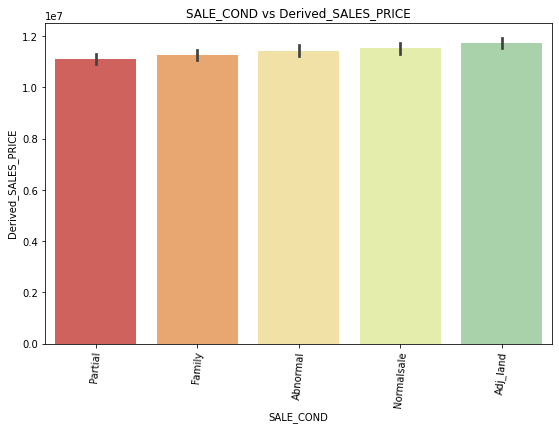

In [33]:
plt.figure(figsize=(20,13))
sns.set_palette('Spectral')
plt.subplot(221)

sns.barplot(x=data.SALE_COND,
            y=data.Derived_SALES_PRICE,order=data.groupby('SALE_COND')['Derived_SALES_PRICE'].mean().reset_index().sort_values('Derived_SALES_PRICE',ascending = True)['SALE_COND'])
plt.xticks(rotation=85)
plt.xlabel('SALE_COND')
plt.ylabel('Derived_SALES_PRICE')
plt.title('SALE_COND vs Derived_SALES_PRICE')

plt.show()

In [34]:
data.groupby("SALE_COND")["Derived_SALES_PRICE"].mean()

SALE_COND
Abnormal      1.143618e+07
Adj_land      1.173969e+07
Family        1.125081e+07
Normalsale    1.151787e+07
Partial       1.111605e+07
Name: Derived_SALES_PRICE, dtype: float64

***NOTE:*** There is a slight linearity in bewteen this feature and target.

***Insigghts:*** This feature Sale codition is may usefull to predict the price of the model. So it can't remove from the data set.
* We have to verify Sale type of the build doesn't affect the cost of the building or not.


PARK_FACIL

In [35]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [36]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':"No"})

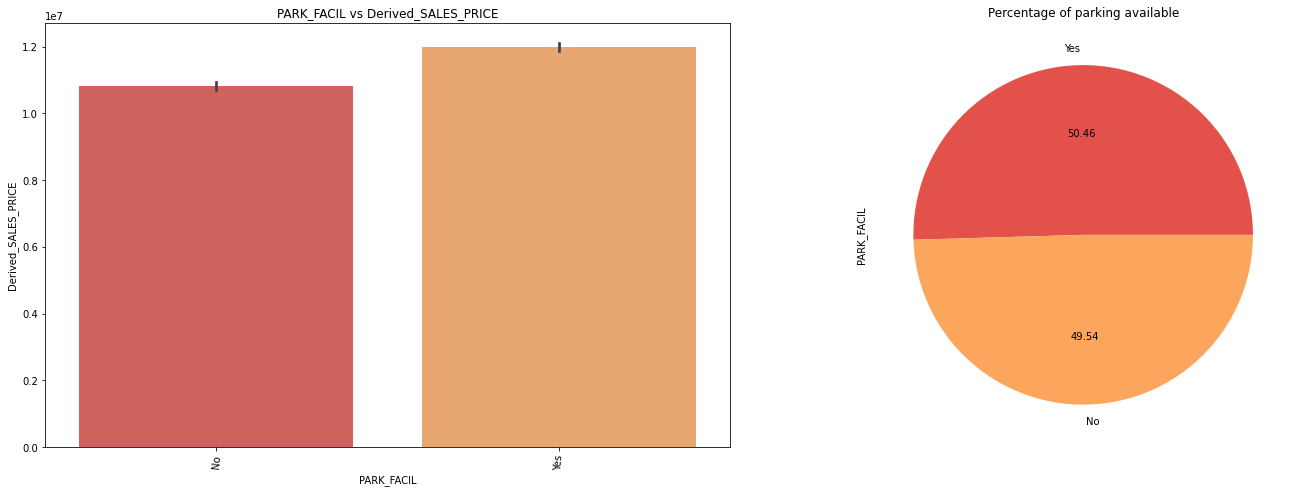

In [37]:
plt.figure(figsize=(20,13))
sns.set_palette('Spectral')
plt.subplot(221)

sns.barplot(x=data.PARK_FACIL,
            y=data.Derived_SALES_PRICE,order=data.groupby('PARK_FACIL')['Derived_SALES_PRICE'].mean().reset_index().sort_values('Derived_SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=85)
plt.xlabel('PARK_FACIL')
plt.ylabel('Derived_SALES_PRICE')
plt.title('PARK_FACIL vs Derived_SALES_PRICE')

plt.subplot(222)
data.PARK_FACIL.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Percentage of parking available")
plt.tight_layout()
plt.show()

***Insights:*** according to pie plot, ~ 50 % of the building were available with **parking facility**.

* rate of mean cost of the all building having the parking facility has higher cost than buildings have no parking facility.

* This feature column has only 2 different value, so encode this feature with binary encoding technique.

In [38]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

BUILDTYPE

In [39]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [40]:
data=data.replace({'BUILDTYPE':{'Commercial':'Commercial', 'Comercial':'Commercial', 'Others':'Others', 'Other':'Others', 'House':'House',}})

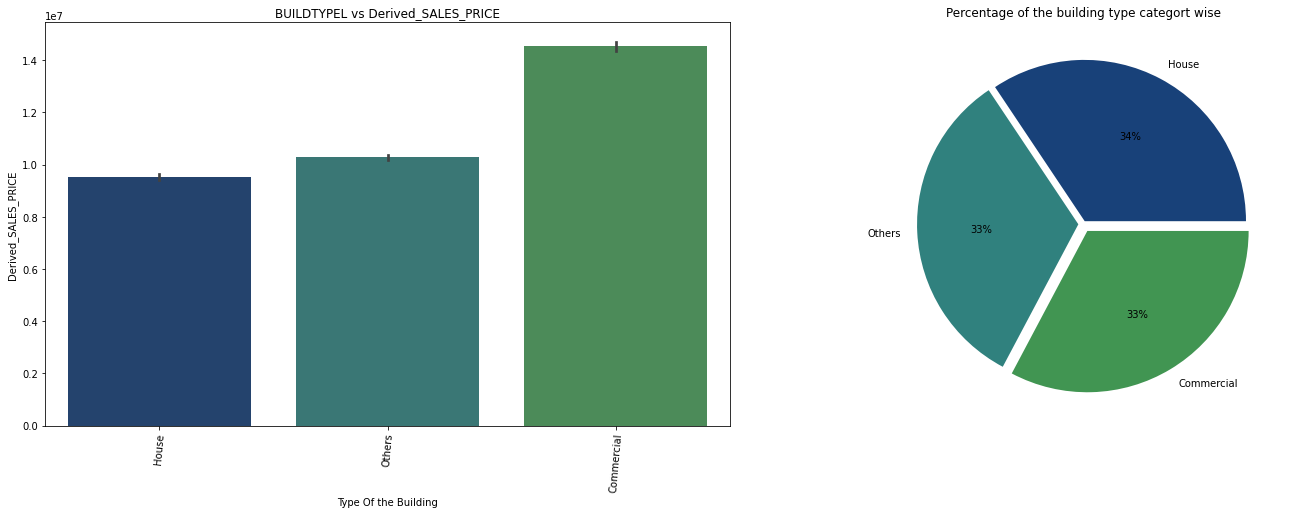

In [41]:
plt.figure(figsize=(20,13))
sns.set_palette('gist_earth')
plt.subplot(221)
sns.barplot(x=data.BUILDTYPE,
            y=data.Derived_SALES_PRICE,order=data.groupby('BUILDTYPE')['Derived_SALES_PRICE'].mean().reset_index().sort_values('Derived_SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=85)
plt.xlabel('Type Of the Building')
plt.ylabel('Derived_SALES_PRICE')
plt.title('BUILDTYPEL vs Derived_SALES_PRICE')

plt.subplot(222)
explode = (0.02, 0.03, 0.05)
data.BUILDTYPE.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode)
plt.ylabel('')
plt.title("Percentage of the building type categort wise")
plt.tight_layout()
plt.show()

***Insights:*** This feature build type has categorical data points in the data set.
* Cost wise commercial build are the higher amount followed by other type and house type buildings.
* percentage of building in each building type was ploted using pie plot.
* apprx all the type of building were equally com to sale.

In [42]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

UTILITY_AVAIL

In [43]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [44]:
data=data.replace({'UTILITY_AVAIL':{'All Pub':'AllPub', 'NoSewr ':'NoSewr', 'NoSeWa':'NoSewa'}})

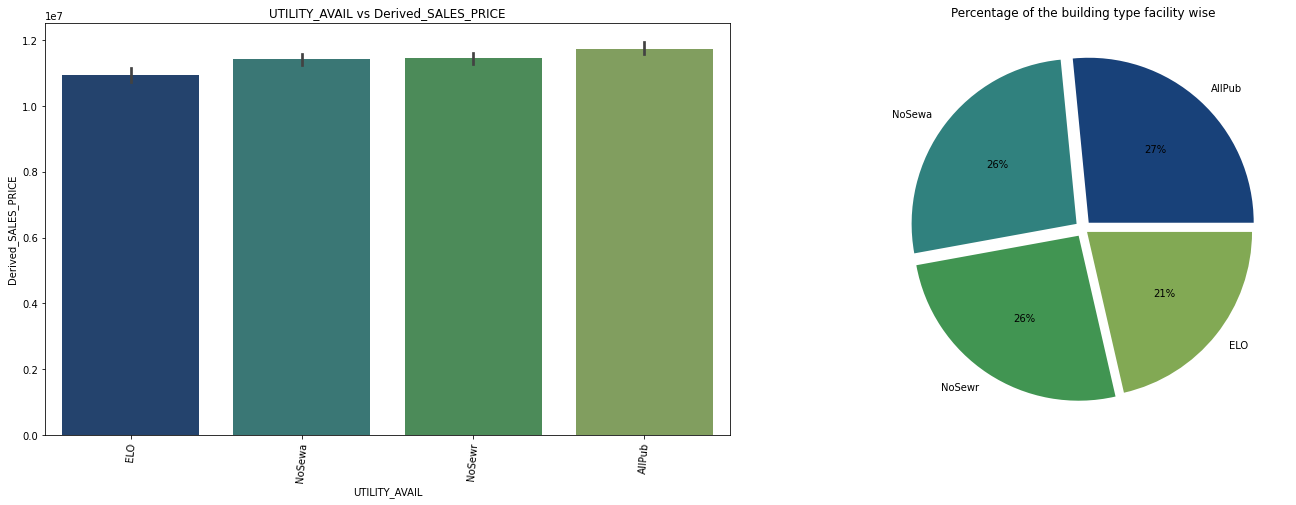

In [45]:
plt.figure(figsize=(20,13))
sns.set_palette('gist_earth')
plt.subplot(221)
sns.barplot(x=data.UTILITY_AVAIL,
            y=data.Derived_SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['Derived_SALES_PRICE'].mean().reset_index().sort_values('Derived_SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=85)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('Derived_SALES_PRICE')
plt.title('UTILITY_AVAIL vs Derived_SALES_PRICE')

plt.subplot(222)
explode = (0.05, 0.05, 0.05,0.03)
data.UTILITY_AVAIL.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode)
plt.ylabel('')
plt.title("Percentage of the building type facility wise")
plt.tight_layout()

plt.show()

In [46]:
dict(data.groupby('UTILITY_AVAIL')['Derived_SALES_PRICE'].mean())

{'AllPub': 11746584.509803921,
 'ELO': 10948868.35282523,
 'NoSewa': 11418772.280064138,
 'NoSewr': 11448590.152542373}

***Insights:*** There is sight linear increses in the fearture "UTILITY_AVAIL".
* **Note:** there is a slight increase increase in the mean cost of the buildings in the category of "NoSewr" compared to "NoSewa".

* all public facility build has higher sale count compared to other type.

Slight linearity in this feature. So we can encode this feature with lable encoding technique.

In [47]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSewa'], dtype=object)

STREET

In [48]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [49]:
data=data.replace({'STREET':{'Paved':'Paved', 'Gravel':'Gravel', 'No Access':'No Access', 'Pavd':'Paved', 'NoAccess':'No Access'}})

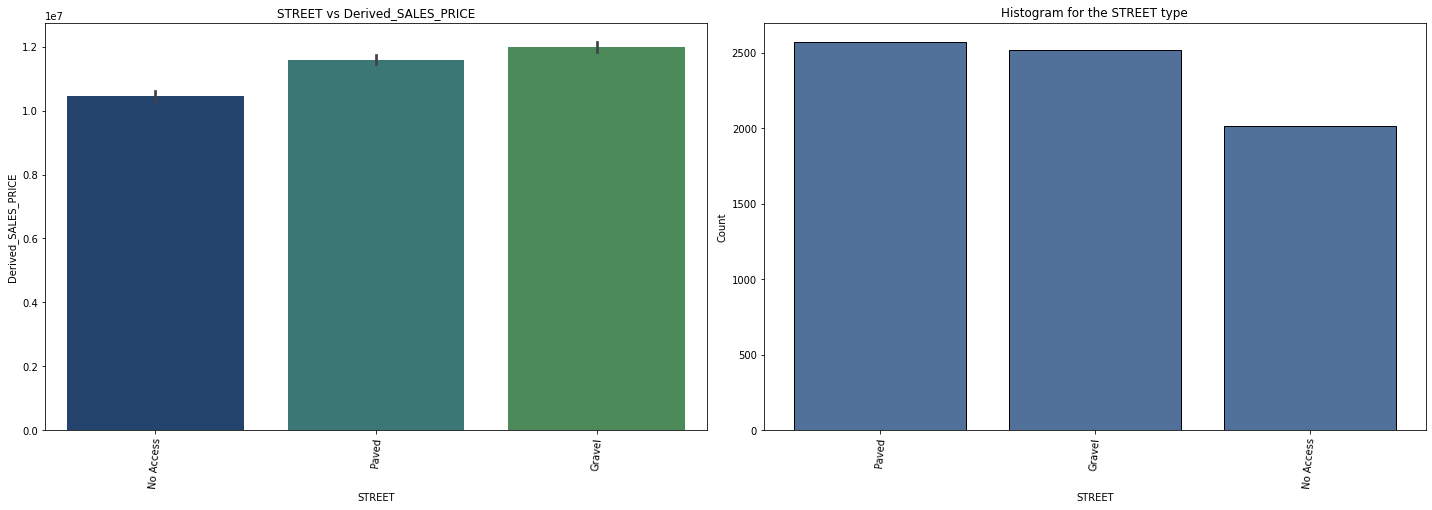

In [50]:
plt.figure(figsize=(20,13))
sns.set_palette('gist_earth')
plt.subplot(221)
sns.barplot(x=data.STREET,
            y=data.Derived_SALES_PRICE,order=data.groupby('STREET')['Derived_SALES_PRICE'].sum().reset_index().sort_values('Derived_SALES_PRICE')['STREET'])
plt.xticks(rotation=85)
plt.xlabel('STREET')
plt.ylabel('Derived_SALES_PRICE')
plt.title('STREET vs Derived_SALES_PRICE')

plt.subplot(222)
sns.histplot(data, x="STREET", shrink=0.8)
plt.title('Histogram for the STREET type')
plt.xticks(rotation=85)
plt.tight_layout()

plt.show()

***Insights***: linearity between the feature "STREET" and traget are good.

* approximately 2500 building have paved street and 2000 builds have no good access path.

In [51]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

MZZONE

In [52]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

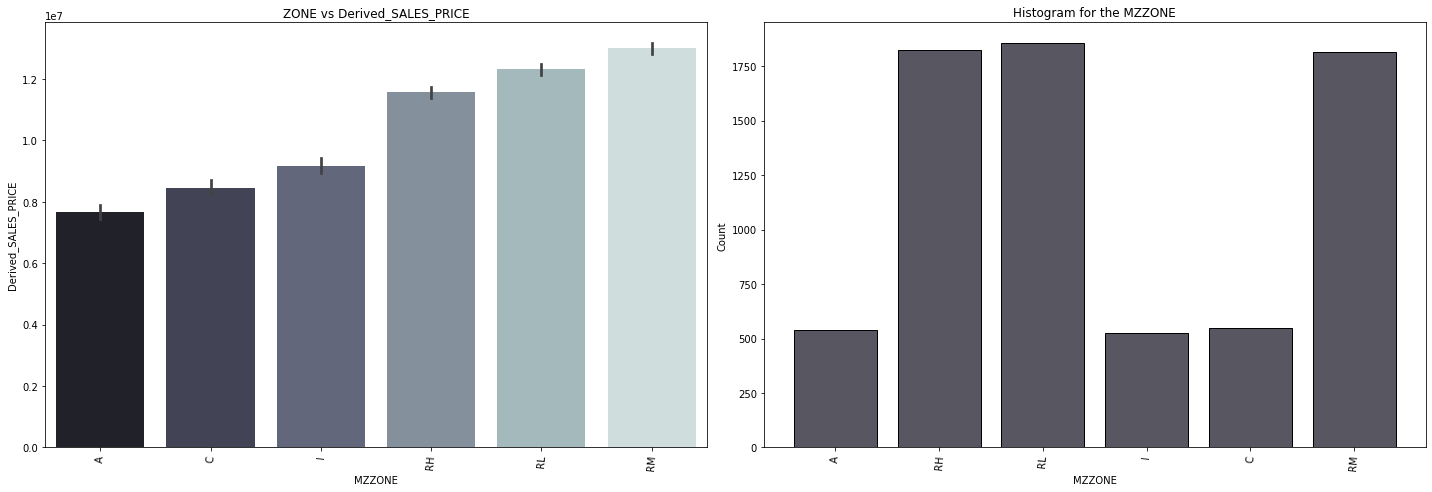

In [53]:
plt.figure(figsize=(20,13))
sns.set_palette('bone')
plt.subplot(221)
sns.barplot(x=data.MZZONE,
            y=data.Derived_SALES_PRICE,order=data.groupby('MZZONE')['Derived_SALES_PRICE'].sum().reset_index().sort_values('Derived_SALES_PRICE')['MZZONE'])
plt.xticks(rotation=85)
plt.xlabel('MZZONE')
plt.ylabel('Derived_SALES_PRICE')
plt.title('ZONE vs Derived_SALES_PRICE')

plt.subplot(222)
sns.histplot(data, x="MZZONE",shrink=0.8)
plt.title('Histogram for the MZZONE')
plt.xticks(rotation=85)
plt.tight_layout()

plt.show()

***Insights***: as per histogram, the no of buildings located in agricultural and industrial zones very low in sales.

* vice versa residential zone has higher no of building Selling.

In [54]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

DATE_BUILD, DATE_SALE

In [55]:
data[['DATE_BUILD', "DATE_SALE"]].head()

,DATE_BUILD,DATE_SALE
0,15-05-1967,04-05-2011
1,22-12-1995,19-12-2006
2,09-02-1992,04-02-2012
3,18-03-1988,13-03-2010
4,13-10-1979,05-10-2009


In [56]:
from dateutil.relativedelta import relativedelta

data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

data['AGE'] = [abs(relativedelta(a, b).years) for a, b in zip(data['DATE_BUILD'], data['DATE_SALE'])]
data.AGE.head()

0    43
1    10
2    19
3    21
4    29
Name: AGE, dtype: int64

1-  Age of the building was derived from the date attributes i.e. [DATE_SALE.DATE_BUILD]

2- So bothe column in the dataset deleted.

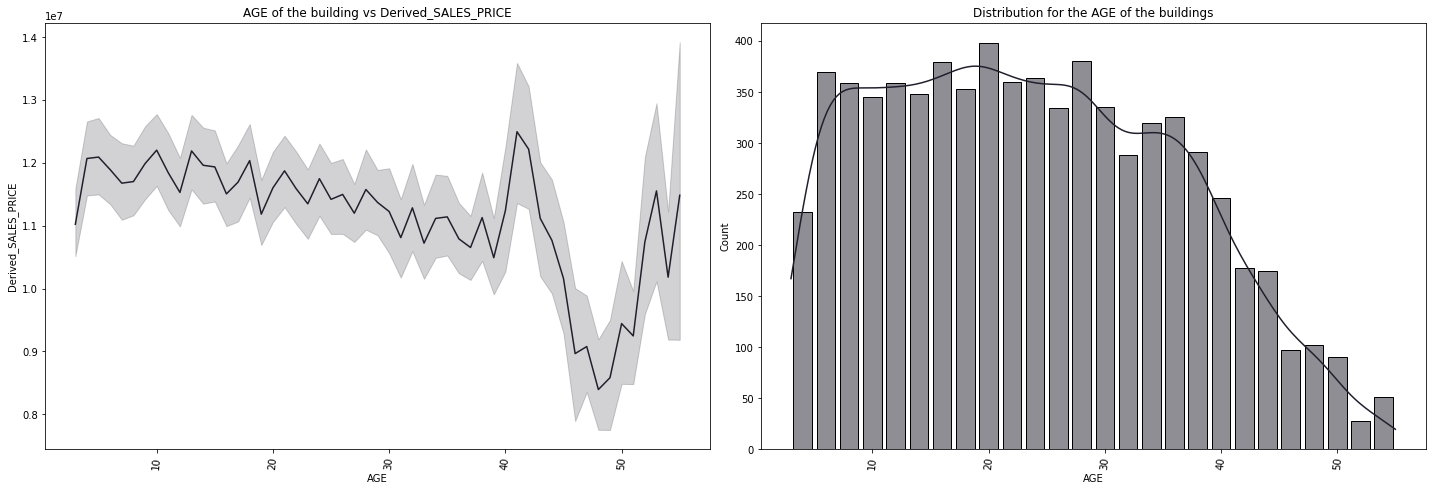

In [57]:
plt.figure(figsize=(20,13))
sns.set_palette('bone')
plt.subplot(221)
sns.lineplot(data=data, x="AGE", y="Derived_SALES_PRICE")
plt.xticks(rotation=85)
plt.xlabel('AGE')
plt.ylabel('Derived_SALES_PRICE')
plt.title('AGE of the building vs Derived_SALES_PRICE')

plt.subplot(222)
sns.histplot(data, x="AGE", binwidth=2, kde=True, shrink=.8)
plt.title('Distribution for the AGE of the buildings')
plt.xticks(rotation=85)
plt.tight_layout()

plt.show()

***Insights:*** oldest buildings were not very less in no for sales.
* in the range of 2 to 40 years old builings were large came for sales.

* as per line plot, we can see the negative corelation betwwen the feature "AGE" and the target data. Mean cost of the buildings reduces when the age of the building increaeses.

In [58]:
data=data.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

There is a slight negative relation in the AGe vs price.

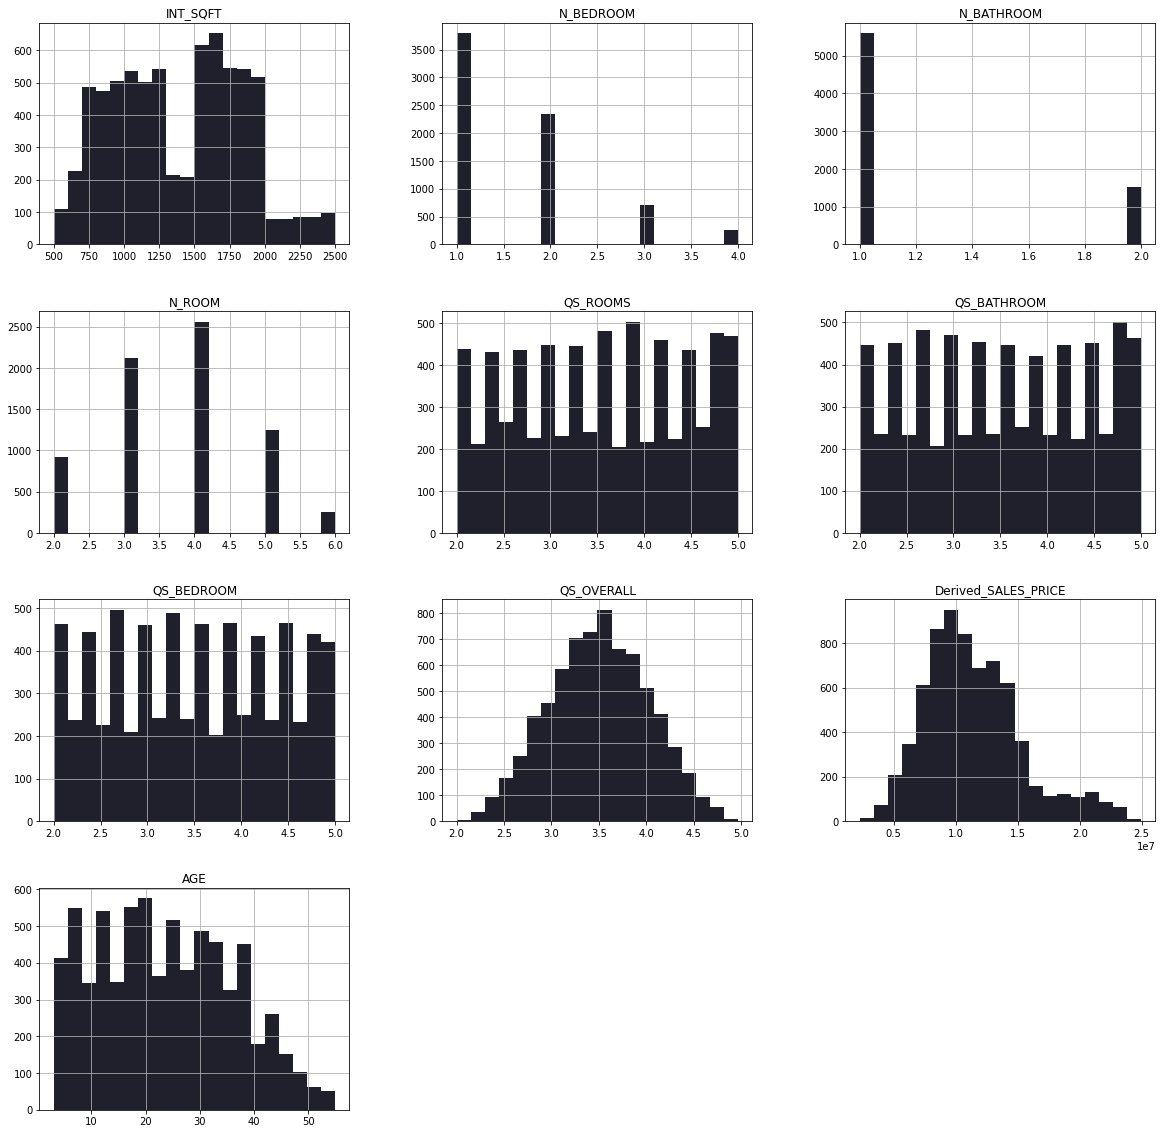

In [59]:
data.hist(figsize=(20,20),bins=20)
plt.show()

In [60]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'Derived_SALES_PRICE', 'AGE'],
      dtype='object')

N_BEDROOM, N_BATHROOM, N_ROOM

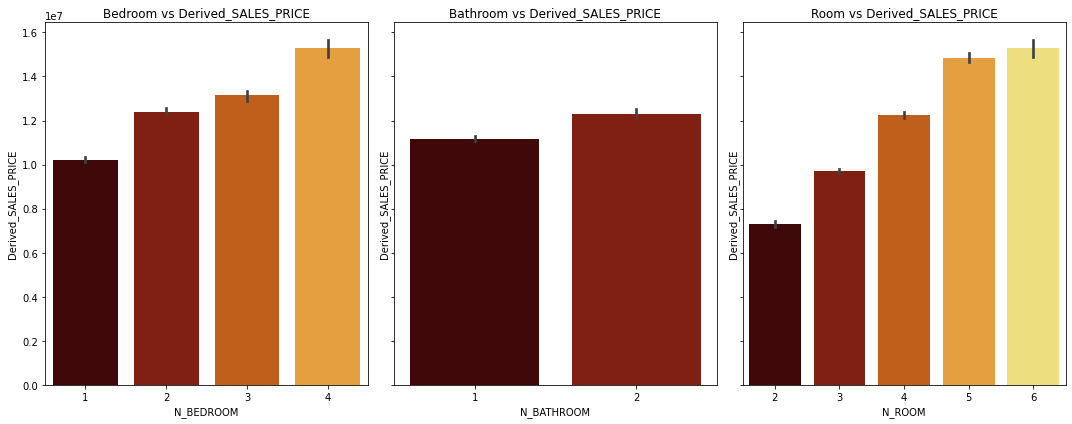

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.set_palette('afmhot')

sns.barplot(ax=axes[0], x=data.N_BEDROOM, y=data.Derived_SALES_PRICE)
axes[0].set_title("Bedroom vs Derived_SALES_PRICE")

sns.barplot(ax=axes[1], x=data.N_BATHROOM, y=data.Derived_SALES_PRICE)
axes[1].set_title("Bathroom vs Derived_SALES_PRICE")

sns.barplot(ax=axes[2], x=data.N_ROOM, y=data.Derived_SALES_PRICE)
axes[2].set_title("Room vs Derived_SALES_PRICE")

plt.tight_layout()
plt.show()

***Insights:*** As per the above bar plots,
* The no of bedroom, bathroom and no of rooms in the buildings increases would give good sales price.
* Total no of room in the buildings increases the cost of the building also increases.
* Buildings with more bathroom were good sales price than least buildings having least bathroom. 

QS_BATHROOM, QS_BEDROOM, QS_OVERALL, Derived_SALES_PRICE

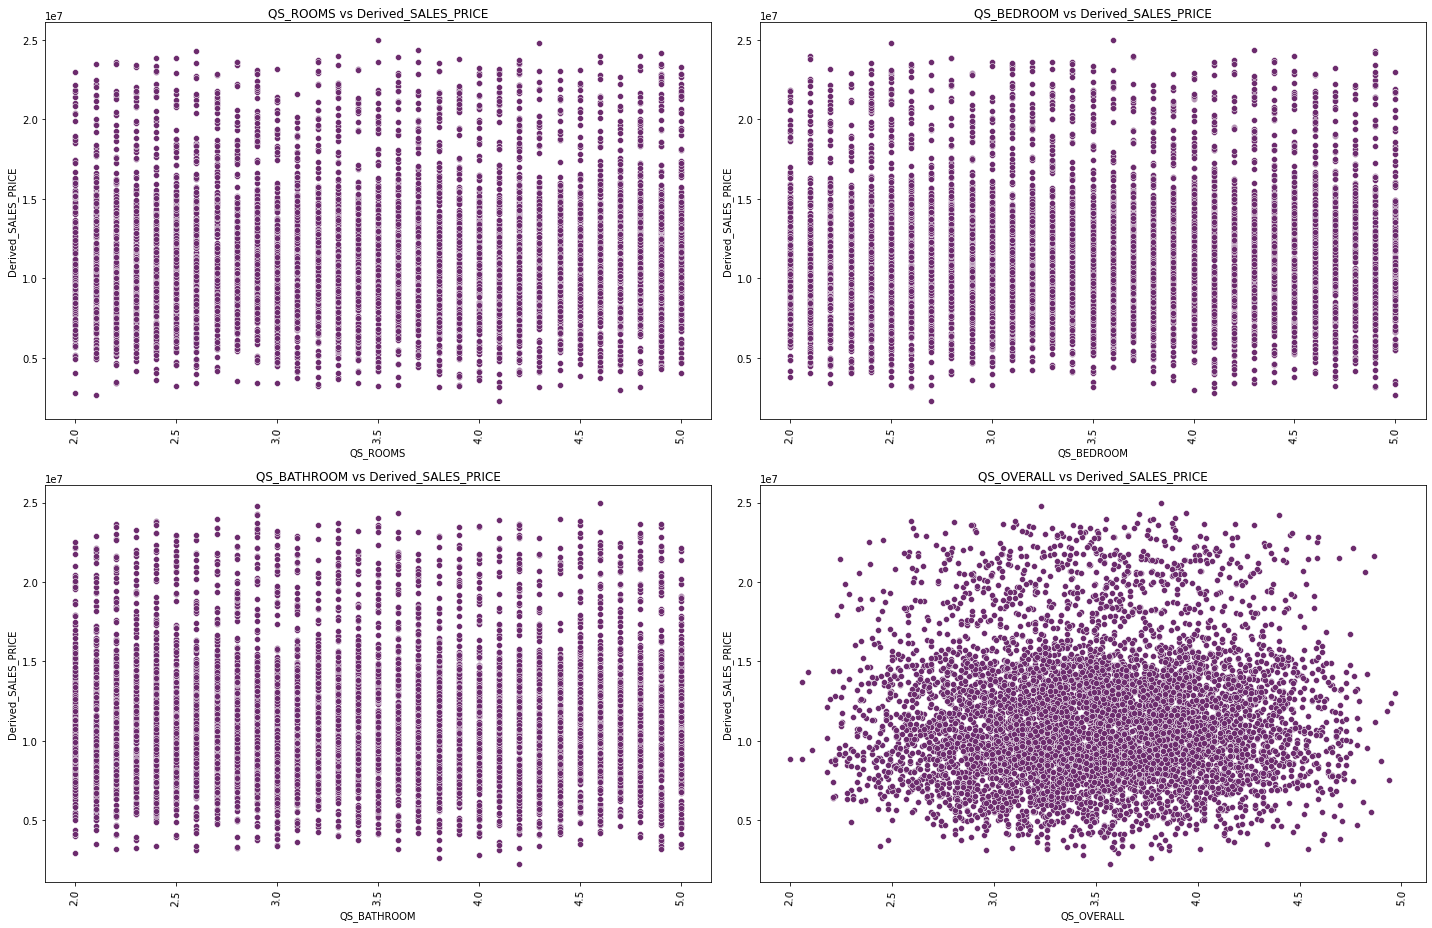

In [62]:
plt.figure(figsize=(20,13))
sns.set_palette('flare_r')
plt.subplot(221)
sns.scatterplot(data=data, x="QS_ROOMS", y="Derived_SALES_PRICE")
plt.xticks(rotation=85)
plt.xlabel('QS_ROOMS')
plt.ylabel('Derived_SALES_PRICE')
plt.title('QS_ROOMS vs Derived_SALES_PRICE')

plt.subplot(222)
sns.scatterplot(data=data, x="QS_BEDROOM", y="Derived_SALES_PRICE")
plt.xticks(rotation=85)
plt.xlabel('QS_BEDROOM')
plt.ylabel('Derived_SALES_PRICE')
plt.title('QS_BEDROOM vs Derived_SALES_PRICE')

plt.subplot(223)
sns.scatterplot(data=data, x="QS_BATHROOM", y="Derived_SALES_PRICE")
plt.xticks(rotation=85)
plt.xlabel('QS_BATHROOM')
plt.ylabel('Derived_SALES_PRICE')
plt.title('QS_BATHROOM vs Derived_SALES_PRICE')

plt.subplot(224)
sns.scatterplot(data=data, x="QS_OVERALL", y="Derived_SALES_PRICE")
plt.xticks(rotation=85)
plt.xlabel('QS_OVERALL')
plt.ylabel('Derived_SALES_PRICE')
plt.title('QS_OVERALL vs Derived_SALES_PRICE')

plt.tight_layout()
plt.show()

***NOTE:*** The features ['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'] havn't any linearity in between the target datapoints.

* The masked data points have no relation with the target data point. 
* So, the features ['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'] were removed from the data set.

In [63]:
data=data.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis=1)

# Other EDA

In [64]:
data.head(1)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Derived_SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,8124400,43


In [65]:
figa=px.scatter(data,x="Derived_SALES_PRICE", y="INT_SQFT", size="N_ROOM",color='AREA',hover_name='MZZONE', title="Square feet vs Sales price of the buildings")
figa.show()

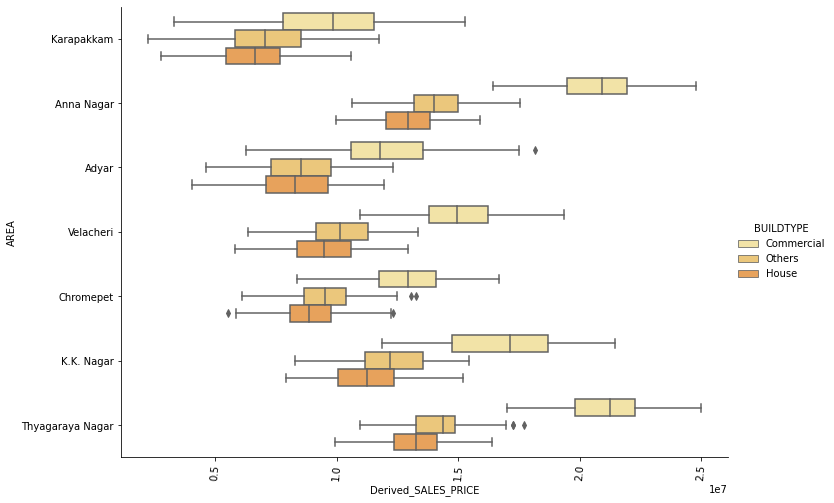

In [66]:
sns.set_palette('YlOrRd')
sns.catplot(x="Derived_SALES_PRICE", y="AREA", hue="BUILDTYPE", kind="box", data=data, ci=None, height=7, aspect=1.5)
plt.xticks(rotation=85)
plt.show()

***Insights:*** cost of the buildings were high in T. nagar and Anna Nagar.

* Anna nagar has the highest cost of houses.

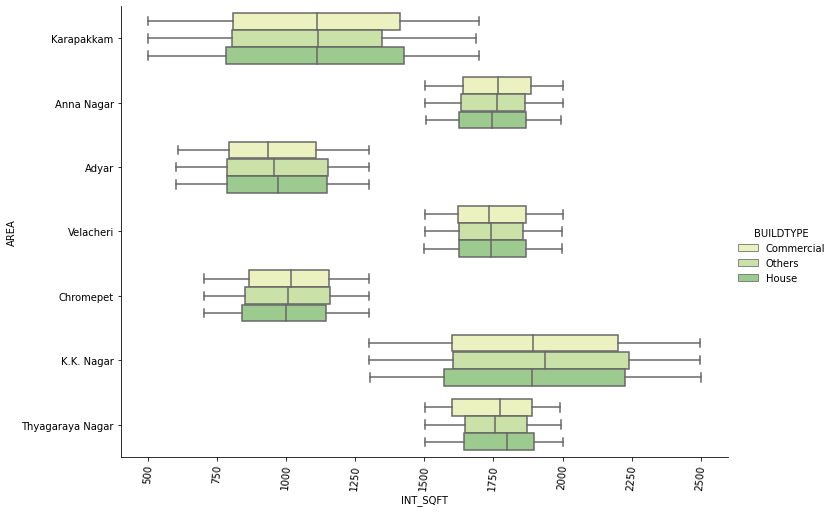

In [67]:
sns.set_palette('YlGn')
sns.catplot(x="INT_SQFT", y="AREA", hue="BUILDTYPE", kind="box", data=data, ci=None, height=7, aspect=1.5)
plt.xticks(rotation=85)
plt.show()

***Insight:*** K.K. Nadar has the larger area of square feet buildings compares to all other area.
* Vice versa, Karapakkam is the area having small buildings.

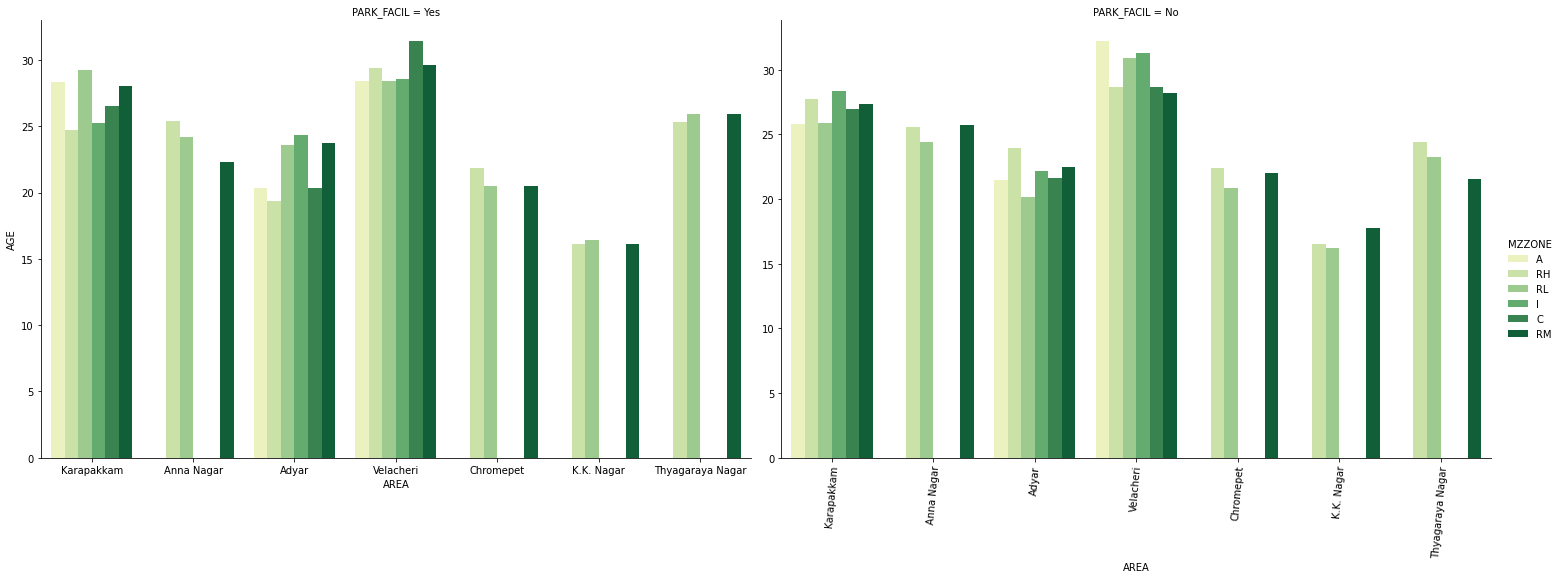

In [68]:
sns.set_palette('YlGn')
sns.catplot(x="AREA", y="AGE", hue="MZZONE", col="PARK_FACIL", kind="bar", data=data, ci=None, height=7, aspect=1.5, sharey=False)
plt.xticks(rotation=85)
plt.show()

***Insights:*** There are buildings located in K.K. nagar were recent establised buildings followed by, Chrompet, adyar..

* right side plot represents the buildings located in various area and saturation show the type of zone with packing facility in the Building.
* all the area has buildings in the Residential type zone with parking and without parking facility.

***Note:***
* The area Anna nagar, Chrompet, K.K. Nagar, Thyagarayar nagar don't have any buildings in the Industrial and C zones (below code confirm this statement).

* At the same time exccept from above mentioned area i.e. Karapakkam, Adayar, Velacheri were the only areas, buildings located in Agri Zone.

In [69]:
data.AREA[data["MZZONE"]=='I'].value_counts()

Karapakkam    239
Velacheri     155
Adyar         131
Name: AREA, dtype: int64

In [70]:
data.AREA[data["MZZONE"]=='A'].value_counts()

Karapakkam    235
Velacheri     166
Adyar         136
Name: AREA, dtype: int64

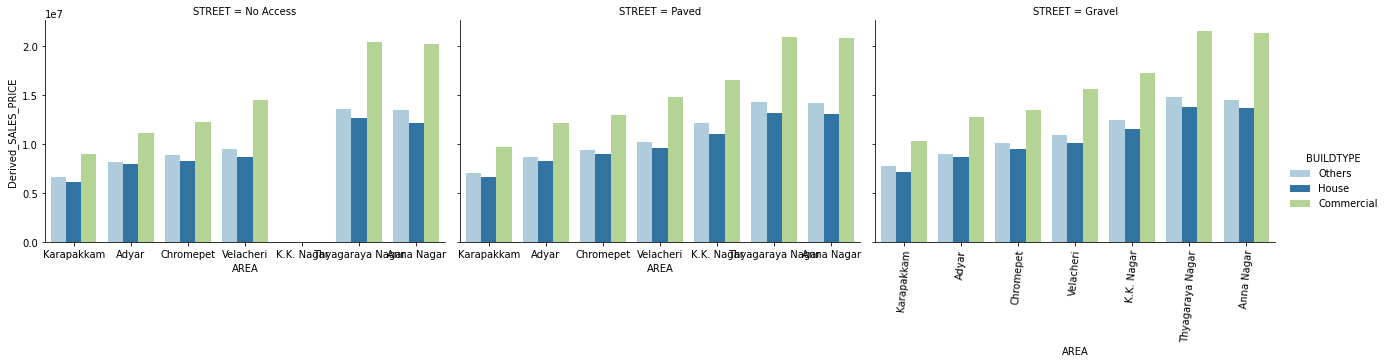

In [71]:
sns.set_palette('Paired')
sns.catplot(x="AREA", y="Derived_SALES_PRICE", hue="BUILDTYPE", col="STREET", kind="bar", data=data.sort_values("Derived_SALES_PRICE"), ci=None, height=4, aspect=1.5)
plt.xticks(rotation=85)
plt.show()

***Insights:***
* In genral, Mean cost of the buildings are highest in Anna nagar followed by Thyagaraya nagar which are commercial Buildings.
* K.K. Nagar buildings are the only buildings completely has good pathway to the main roads, i.e. Paved or gravel pathway

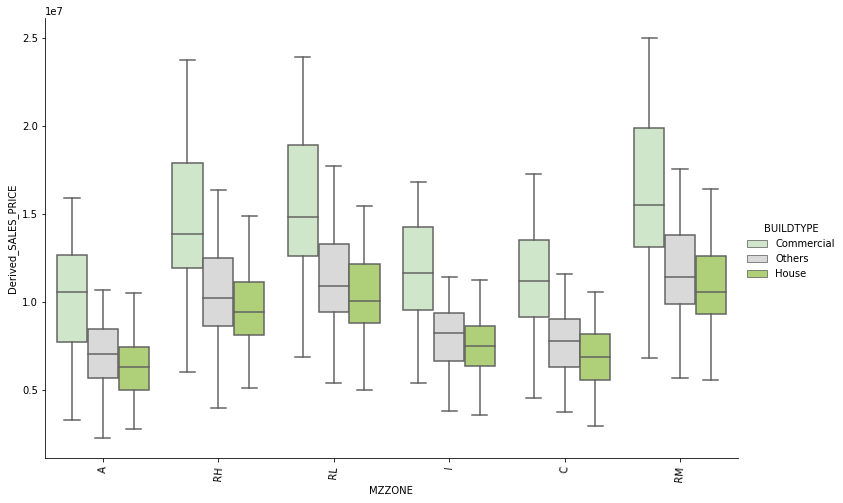

In [72]:
sns.set_palette('Set3_r')
sns.catplot(x="MZZONE", y="Derived_SALES_PRICE", hue="BUILDTYPE", kind="box", data=data, ci=None, height=7, aspect=1.5)
plt.xticks(rotation=85)
plt.show()

**`Insights:`** residential type RH, RL, RM zone has highest cost of commercial bulidings.

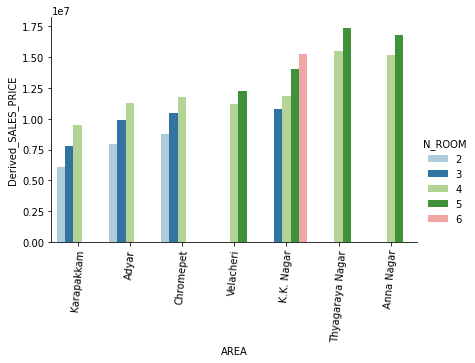

In [73]:
sns.set_palette('Paired')
sns.catplot(x="AREA", y="Derived_SALES_PRICE", hue="N_ROOM", kind="bar", data=data.sort_values("Derived_SALES_PRICE"), ci=None, height=4, aspect=1.5)
plt.xticks(rotation=85)
plt.show()

***Insights:*** no of rooms increasees price of the building increrase.

* Buildings having 7 no of rooms availabile only in K.K. Nagar.
* Karapakkam, Adayar, Chromepet only have maximum of 4 rooms only.
* Velacheri, T. Nagar, Anna nagar has only 4 or 5 rooms in the building. i.e. no less no of rooms than 4.

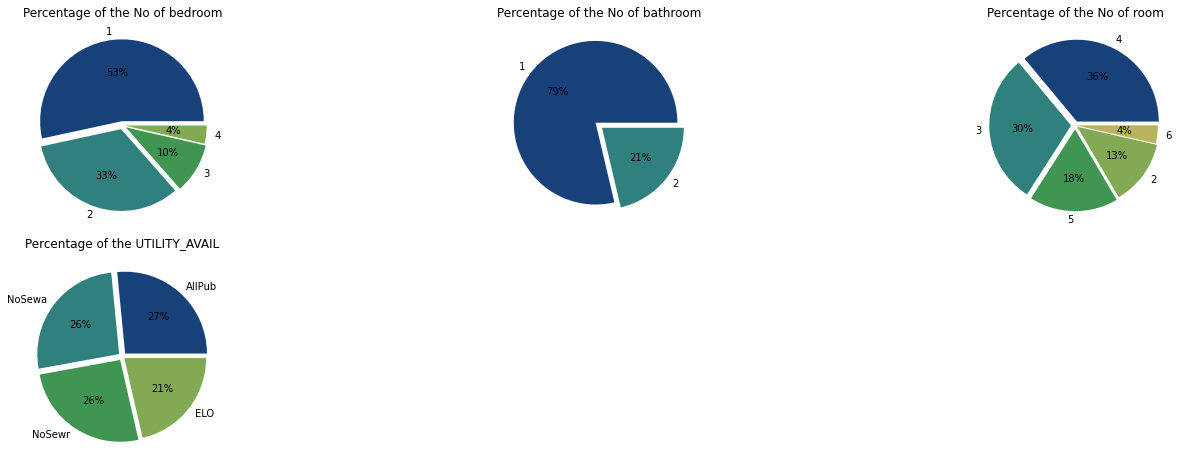

In [74]:
plt.figure(figsize=(20,13))
sns.set_palette('gist_earth')
plt.subplot(431)
data.N_BEDROOM.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05, 0.05,0.03))
plt.ylabel('')
plt.title("Percentage of the No of bedroom")

plt.subplot(432)
explode = (0.05, 0.05)
data.N_BATHROOM.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode)
plt.ylabel('')
plt.title("Percentage of the No of bathroom")

plt.subplot(433)
explode = (0.05, 0.05, 0.05,0.03, 0.01)
data.N_ROOM.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode)
plt.ylabel('')
plt.title("Percentage of the No of room")
plt.tight_layout()

plt.subplot(434)
explode = (0.05, 0.05, 0.05,0.03)
data.UTILITY_AVAIL.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode)
plt.ylabel('')
plt.title("Percentage of the UTILITY_AVAIL")
plt.tight_layout()

plt.show()

***Insights:*** 
* No. of bedrooms "4" has less no of buildings.
* 97 % of the buildings has only one bathroom.
* 60 % of the buildings has more than 2 no of room in it.
* 27% of the buildings hhas all public facilities.

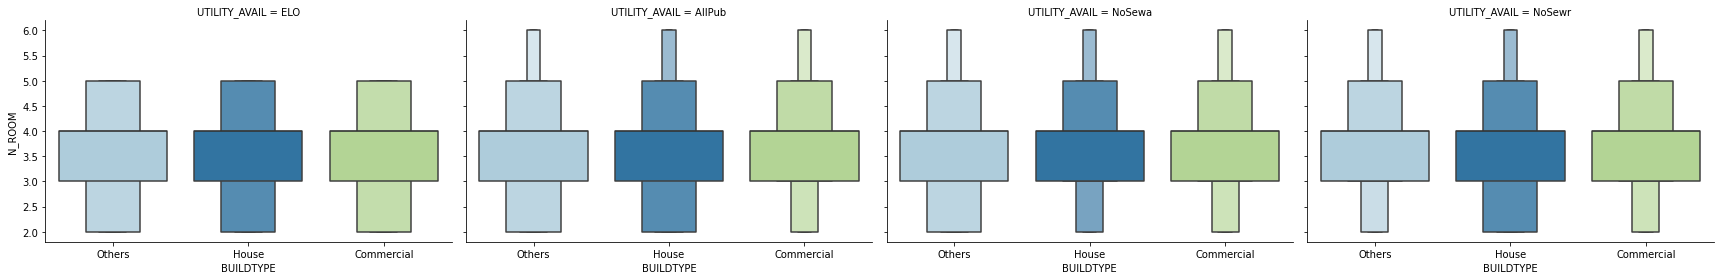

In [75]:
sns.set_palette('Paired')
sns.catplot(x="BUILDTYPE", y="N_ROOM", kind="boxen", col="UTILITY_AVAIL", data=data.sort_values("N_ROOM"), height=4, aspect=1.5)
plt.show()

***Insights:*** Building without utility feature ELO don't have 6 rooms.

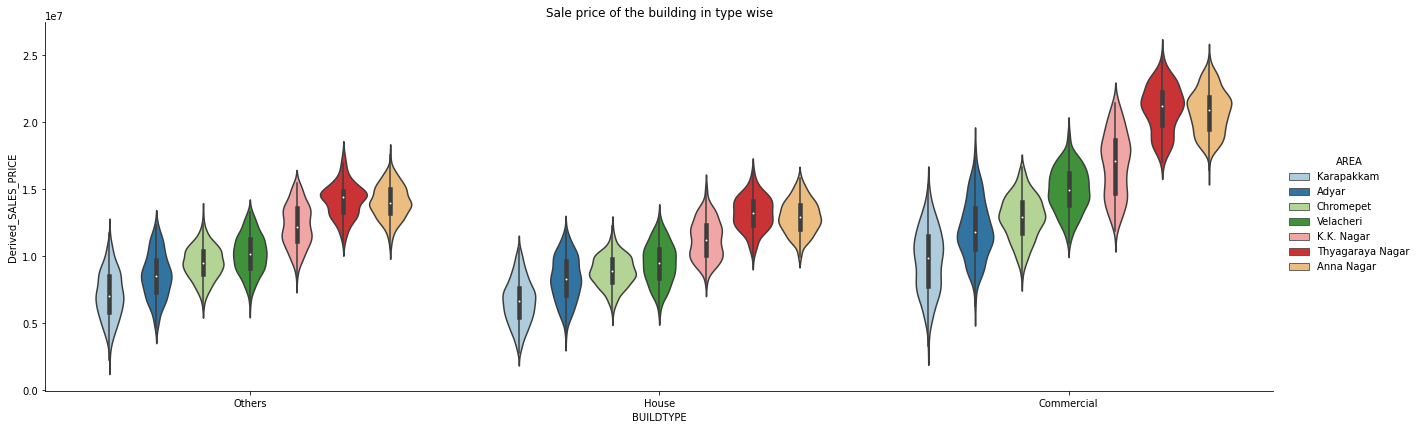

In [76]:
sns.catplot(x="BUILDTYPE", y="Derived_SALES_PRICE", hue="AREA", kind="violin", split=False, data=data.sort_values("Derived_SALES_PRICE"), height=6, aspect=3)
plt.title('Sale price of the building in type wise')
plt.show()

***Insights:*** Anna nagar has the highest mean rate of cost of the building, in all the 3 type of building type.

* Houses start from the raange of 30 lakhs to 1.5 cores appx.
* Commercial buildings start from the raange of 30 lakhs to 2.7 cores appx.
* Other type of  buildings start from the raange of 30 lakhs to 1.7 cores appx.

In [77]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Derived_SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,8124400,43
1,Anna Nagar,1986,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,22781941,10
2,Adyar,909,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13672408,19
3,Velacheri,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,10063653,21
4,Karapakkam,1226,1,1,3,Abnormal,Yes,Others,AllPub,Gravel,C,7717313,29


# Encode



* Encoding of the binary and ordinal data points are converted using label encoding technique.
* Nominal data points in the data set need one hot encoding technique.

* Data point ['AREA', 'PARK_FACIL', 'SALE_COND','UTILITY_AVAIL', 'STREET', "MZZONE", needs label encoing.
* and, BUILDTYPE feature needs one hot encoding.

In [78]:
# creating duplicate data set

final_data=data

In [79]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Derived_SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,8124400,43
1,Anna Nagar,1986,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,22781941,10
2,Adyar,909,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13672408,19
3,Velacheri,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,10063653,21
4,Karapakkam,1226,1,1,3,Abnormal,Yes,Others,AllPub,Gravel,C,7717313,29


In [80]:
data = data.replace({'AREA':{'Karapakkam':1,"Adyar":2, "Chromepet":3, "Velacheri":4, "K.K. Nagar":5, "Anna Nagar":6, 'Thyagaraya Nagar':7}})

In [81]:
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1, 'No':0})

In [82]:
data.SALE_COND = data.SALE_COND.map({"Abnormal":3,"Adj_land":5, "Family":2, "Normalsale":4, "Partial":1})

In [83]:
data=data.replace({'UTILITY_AVAIL':{'ELO':1, 'NoSewa':2, 'NoSewr':3, "AllPub":4}})

In [84]:
data=data.replace({'STREET':{'Gravel':2, 'Paved':3, 'No Access':1}})

In [85]:
data=data.replace({'MZZONE':{'A':1, 'C':2, 'I':3, 'RH':4,'RL':5,'RM':6,}})

In [86]:
from sklearn.preprocessing import LabelEncoder
typee = data.BUILDTYPE
buildtype = pd.get_dummies(typee)
data = pd.concat([data, buildtype],axis=1)
del data['BUILDTYPE']

In [87]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,Derived_SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,1,4,3,1,8124400,43,1,0,0
1,6,1986,2,1,5,3,0,4,2,4,22781941,10,1,0,0
2,2,909,1,1,3,3,1,1,2,5,13672408,19,1,0,0
3,4,1855,3,2,5,2,0,3,3,3,10063653,21,0,0,1
4,1,1226,1,1,3,3,1,4,2,2,7717313,29,0,0,1


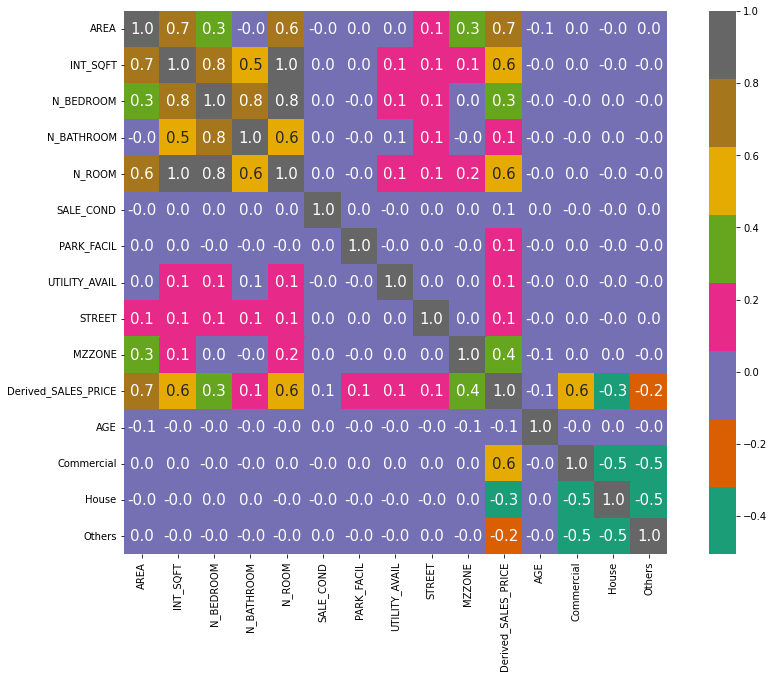

In [88]:
corelation=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corelation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Dark2')
plt.show()

***Insights:*** 

* the data points [AREA, INT_SQFT,	N_BEDROOM, 	N_ROOM MZZONE, Commercial,	House,	Others] has good coleration amoung the other data points with Derived_SALES_PRICE.

# Train and Test data split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# Spliting target and features variables
X = data.drop(['Derived_SALES_PRICE','AREA'], axis = 1)
y = data['Derived_SALES_PRICE']

# Splitting to training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [91]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))

# Scalling

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

##Model

* for continous values of the target data, use regression model.
* this the Supervised learing problem.

#Linear regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
print("C value:", regressor.intercept_)

C value: -1304016.3529758863


In [96]:
print("Co-efficient:", regressor.coef_)

Co-efficient: [    3169.94482608 -1891555.08435695  -931838.40082193  2249454.53399119
   163100.19807635  1080040.56712578    83104.15814498   243126.1675101
   720305.36099291   -24292.79528631  3004485.74596393 -1856220.02198559
 -1148265.72397834]


In [97]:
y_pred_train_lr = regressor.predict(X_train)
y_pred_train_lr

array([ 8656304.58281178,  6047341.03571562,  7252958.02930256, ...,
       17306858.00494624, 10821912.13648219, 12670253.5080373 ])

In [98]:
Actu_Pred_df_lr = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_lr})
Actu_Pred_df_lr.head()

,Actual,Predicted
6136,8095385,8.656305e+06
2345,7621273,6.047341e+06
4112,7040225,7.252958e+06
649,8598124,7.931011e+06
6735,6489716,5.855475e+06


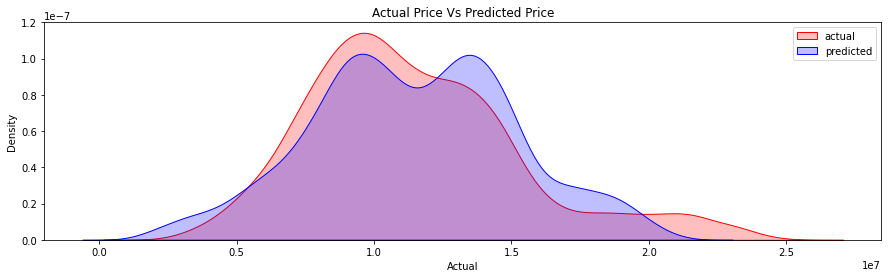

In [99]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=Actu_Pred_df_lr, x='Actual', label='actual', color = 'red',shade=True)
sns.kdeplot(data=Actu_Pred_df_lr, x='Predicted', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

***Insights:*** the above plot shows how linear regression model predict the sale price of the building.

* Plot show how predict price of the building fits with the actual price. 

In [100]:
from sklearn import metrics 
r2_lr_train=metrics.r2_score(y_train,y_pred_train_lr)
print('R^2- SCORE for train data using LinearRegression:', metrics.r2_score(y_train,y_pred_train_lr))

R^2- SCORE for train data using LinearRegression: 0.8957440580346058


In [101]:
y_train.shape, y_pred_train_lr.shape

((5687,), (5687,))

In [102]:
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_train_lr))

MAE: 970314.4830844498
MSE: 1625791800516.0078


In [103]:
importance = regressor.coef_
# summarize feature importance\

len(importance), importance

(13, array([    3169.94482608, -1891555.08435695,  -931838.40082193,
         2249454.53399119,   163100.19807635,  1080040.56712578,
           83104.15814498,   243126.1675101 ,   720305.36099291,
          -24292.79528631,  3004485.74596393, -1856220.02198559,
        -1148265.72397834]))

In [104]:
coeffcients = pd.DataFrame([X_train.columns,regressor.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,INT_SQFT,3169.944826
1,N_BEDROOM,-1891555.084357
2,N_BATHROOM,-931838.400822
3,N_ROOM,2249454.533991
4,SALE_COND,163100.198076
5,PARK_FACIL,1080040.567126
6,UTILITY_AVAIL,83104.158145
7,STREET,243126.16751
8,MZZONE,720305.360993
9,AGE,-24292.795286


# Random forecast

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [106]:
# Create a Random Forest Regressor
randomf = RandomForestRegressor(n_estimators= 100, max_depth =30, max_features='sqrt')

# Train the model using the training sets 
randomf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt')

In [107]:
# Model prediction on train data
y_pred_train_rf = randomf.predict(X_train)

In [108]:
# Model Evaluation
r2_rf_train=metrics.r2_score(y_train, y_pred_train_rf)
print('R^2- SCORE for train data using Random Forest:',metrics.r2_score(y_train, y_pred_train_rf))

R^2- SCORE for train data using Random Forest: 0.9956303525930085


In [109]:
Actu_Pred_df_rf = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_rf})
Actu_Pred_df_rf.head()

,Actual,Predicted
6136,8095385,8236964.82
2345,7621273,7568671.64
4112,7040225,7243611.76
649,8598124,8238002.21
6735,6489716,6653125.88


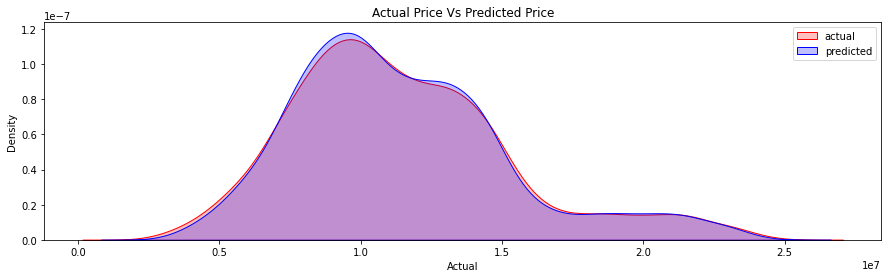

In [110]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=Actu_Pred_df_rf, x='Actual', label='actual', color = 'red',shade=True)
sns.kdeplot(data=Actu_Pred_df_rf, x='Predicted', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

***Insights:*** the above plot shows how ramndom forest model predict the sale price of the building.

* Plot show how predict price of the building fits with the actual price. 

In [111]:
#Get numerical feature importances
importances = list(randomf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Commercial           Importance: 0.23
Variable: INT_SQFT             Importance: 0.22
Variable: N_ROOM               Importance: 0.18
Variable: MZZONE               Importance: 0.11
Variable: N_BEDROOM            Importance: 0.07
Variable: House                Importance: 0.06
Variable: AGE                  Importance: 0.03
Variable: Others               Importance: 0.03
Variable: N_BATHROOM           Importance: 0.02
Variable: PARK_FACIL           Importance: 0.02
Variable: SALE_COND            Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.01
Variable: STREET               Importance: 0.01


***Insights:***

* INT_SQRT, Commercial type, N_ROOMS, MZZONE, N_BEDROOM< House, OTHER are very importance features in the given data set.

#XG Boost

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
for l in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgb = XGBRegressor(learning_rate = l, n_estimators=100, verbosity = 0)
  xgb.fit(X_train,y_train)
  print("Learning rate : ", l, " Train score : ", xgb.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4335145465760284  Cross-Val score :  -0.4436851931840356
Learning rate :  0.02  Train score :  0.6999591732612774  Cross-Val score :  0.6940422034063164
Learning rate :  0.03  Train score :  0.88077291827725  Cross-Val score :  0.8763772836530686
Learning rate :  0.04  Train score :  0.9230616489877433  Cross-Val score :  0.9186308070464045
Learning rate :  0.05  Train score :  0.9433238988482913  Cross-Val score :  0.9372270615695465
Learning rate :  0.1  Train score :  0.9726865947020711  Cross-Val score :  0.9668882356766971
Learning rate :  0.11  Train score :  0.9732930757885475  Cross-Val score :  0.9690570503029454
Learning rate :  0.12  Train score :  0.975870136102642  Cross-Val score :  0.9709929184130959
Learning rate :  0.13  Train score :  0.9759419878171967  Cross-Val score :  0.9719670692699758
Learning rate :  0.14  Train score :  0.9764998197566326  Cross-Val score :  0.9730267519351689
Learning rate :  0.15  Train score :  0.97

In [113]:
xgb = XGBRegressor(learning_rate = 0.5, n_estimators=100, verbosity=0)
xgb.fit(X_train,y_train)

XGBRegressor(learning_rate=0.5, verbosity=0)

In [114]:
y_pred_train_xgb = xgb.predict(X_train)

In [115]:
r2_xgb_train=metrics.r2_score(y_train,y_pred_train_xgb)
print('R^2- SCORE for train data using XGBoost', metrics.r2_score(y_train,y_pred_train_xgb))

R^2- SCORE for train data using XGBoost 0.9862256208093604


In [116]:
Actu_Pred_df_xgb = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_xgb})
Actu_Pred_df_xgb.head()

,Actual,Predicted
6136,8095385,7893845.0
2345,7621273,7850161.0
4112,7040225,6981612.5
649,8598124,7601078.5
6735,6489716,7100682.5


In [117]:
Actu_Pred_df_xgb.describe()

,Actual,Predicted
count,5.687000e+03,5687.00
mean,1.143674e+07,11436695.00
std,3.949301e+06,3921596.75
min,2.253935e+06,2206786.75
25%,8.660296e+06,8697567.00
50%,1.085849e+07,10814262.00
75%,1.362671e+07,13561881.00
max,2.496904e+07,24785582.00


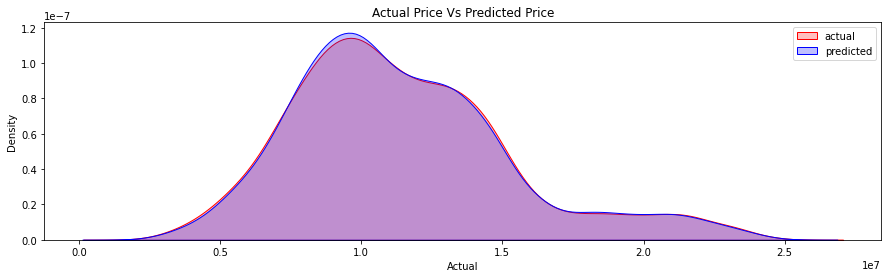

In [118]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=Actu_Pred_df_xgb, x='Actual', label='actual', color = 'red',shade=True)
sns.kdeplot(data=Actu_Pred_df_xgb, x='Predicted', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

***Insights:*** the above plot shows how linear regression model predict the sale price of the building.

* Plot show how predict price of the building fits with the actual price. 

* XGB boost medel shows excellent fit of predict price of the building with thw actual price.

In [119]:
models = pd.DataFrame({'model_name':['LinearRegression','DecissionTree','RandomForest'],'r2_score_train':[r2_lr_train, r2_rf_train, r2_xgb_train]})
models

,model_name,r2_score_train
0,LinearRegression,0.895744
1,DecissionTree,0.995630
2,RandomForest,0.986226


***Insights:***  R^2 value of the 3 different model i.e. 

*   LinearRegression
*   DecissionTree
*   XGBoost

***NOTE:***
* DecissionTree model gives better r^2 value for the train data set.

For negotiate price range for the customer, 
* Calculte the diiference from the predicted price and actual price of the building.
* Then, Find the Standard deviation of the difference column.
* Using SD, we calculate the range of the price of the building.

Here, Random forest give better r^2 value. So, I chose RF model to calculate negotiate price range. 

In [120]:
y_pred_test_rf = randomf.predict(X_test)
x=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_rf})

In [121]:
Actu_Pred_df_rf=pd.concat([Actu_Pred_df_rf, x])

In [122]:
Actu_Pred_df_rf.shape

(7109, 2)

In [123]:
Actu_Pred_df_rf["Difference"]=abs(Actu_Pred_df_rf["Actual"]-Actu_Pred_df_rf["Predicted"])

In [124]:
Actu_Pred_df_rf.head(1)

,Actual,Predicted,Difference
6136,8095385,8236964.82,141579.82


In [125]:
Actu_Pred_df_rf.isnull().sum()

Actual        0
Predicted     0
Difference    0
dtype: int64

In [126]:
sd=Actu_Pred_df_rf["Difference"].std()
sd

281597.08319899207

In [127]:
final_data["negotiate_price_start"]= abs(Actu_Pred_df_rf["Predicted"]-sd)
final_data["negotiate_price_end"]= abs(Actu_Pred_df_rf["Predicted"]+sd)
final_data[["negotiate_price_start", "negotiate_price_end"]].head(1)

,negotiate_price_start,negotiate_price_end
0,8.426048e+06,8.989242e+06


In [128]:
final_data["negotiate_price_start"] = final_data["negotiate_price_start"].astype('int64')
final_data["negotiate_price_end"] = final_data["negotiate_price_end"].astype('int64') 

In [129]:
final_data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Derived_SALES_PRICE,AGE,negotiate_price_start,negotiate_price_end
0,Karapakkam,1004,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,8124400,43,8426047,8989242
1,Anna Nagar,1986,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,22781941,10,22281468,22844662
2,Adyar,909,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13672408,19,13058016,13621210
3,Velacheri,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,10063653,21,9750391,10313585
4,Karapakkam,1226,1,1,3,Abnormal,Yes,Others,AllPub,Gravel,C,7717313,29,7935364,8498558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,Adj_land,No,Others,ELO,No Access,RM,5668827,49,6320948,6884142
7105,Velacheri,1897,3,2,5,Family,Yes,Others,NoSewa,No Access,RH,11370222,8,11123178,11686372
7106,Velacheri,1614,2,1,4,Normalsale,No,House,NoSewa,Gravel,I,8835792,28,8323675,8886869
7107,Karapakkam,787,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,9051448,31,9255652,9818847


#***Conclusion:***

* Customer can negotiate the price of the building using the data column in the  final data set.

* Column were [Derived_SALES_PRICE,	negotiate_price_start,	negotiate_price_end]

* The price of the buildings is increases only when the following factor covered in the building.

* Commercial type buildings are the most expensive type buildings in the group of building type (Commercial, House, Others) followed by others, House (refer voilini plot).

  * So, Seller may concern about the commercial build to expand the revenue.

* I genral, Thyagaraya nagar and Anna Nagar houses were the most expanse building in the data.

  * Seller may construct the House in that particular area may increase the house price.
  * construct the commercial building in the Anna nagar and Thyagaraya nagar were increases the cost of the building, seller must concentrate in that paricular type of building in this areas.

* In General, Sale price increases w.r.t. square feet of the building increases.
  * the buildings greater than 2000 square feet were the available only in K.K. Nagar. 
  * customer wants house with good spacital region, they were looking in the area of K.K. nagar. price of the houses were moderate in range.

* Sellers must give importance to the no of rooms, Bedroom, bathroom. Because 
  * No of rooms, Bedroom, bathroom increase the building cost also increases.

* All the area have buildings in the RH zone.

* 27 % has all public facility.

* commercial buildings in the Residential Zones RH, RL ,RM give good sale price of the building. Hence, Seller must focus on this Zone to establise the commercial buildings.